<h2>Imports</h2>

In [248]:
import numpy as np

<h2>1.) Dense Layer Class</h2>

![Dense Layer 1.jpg](<attachment:Dense Layer 1.jpg>)
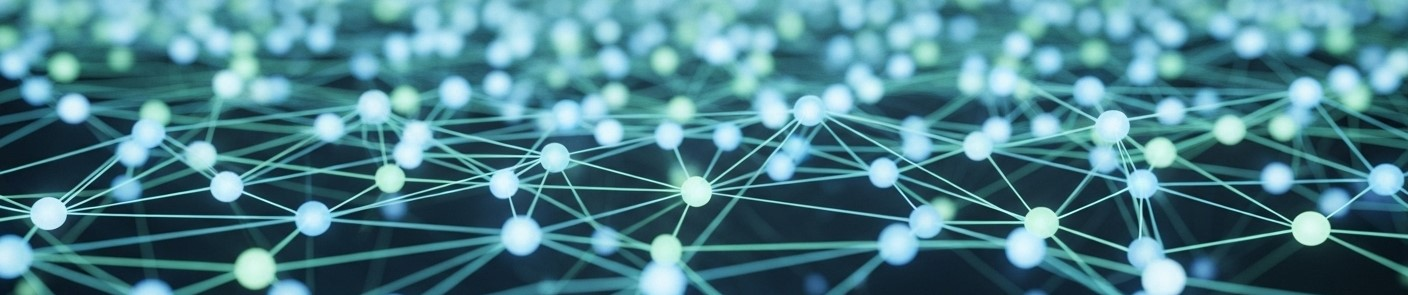

In [249]:
class Dense_Layer:
    def __init__(self, inputs, weights, bias):
        """
        Store inputs, weights, and bias for the layer
        """
        self.inputs = np.array(inputs)     # is the input vector
        self.weights = np.array(weights)   # is the weight matrix
        self.bias = np.array(bias)         # is the bias vector
    
    def weighted_sum(self):
        """
        Compute the weighted sum: Z = XW + B
        """
        return np.dot(self.inputs, self.weights) + self.bias

    def activation(self, z, function="relu"):
        """
        Apply activation function
        """
        if function == "relu":
            return np.maximum(0, z)
        elif function == "sigmoid":
            return 1 / (1 + np.exp(-z))
        elif function == "softmax":
            exp_z = np.exp(z - np.max(z))  # stability trick
            return exp_z / np.sum(exp_z)
        else:
            return z   # no activation

    def calculate_loss(self, predicted, target):
        """
        Calculate cross-entropy loss
        predicted: output from last layer (e.g. softmax probabilities)
        target: one-hot encoded true label
        """
        predicted = np.array(predicted)
        target = np.array(target)
        return -np.sum(target * np.log(predicted + 1e-9))  # +1e-9 avoids log(0)

<h2>2. b.) Breast Cancer Dataset</h2>

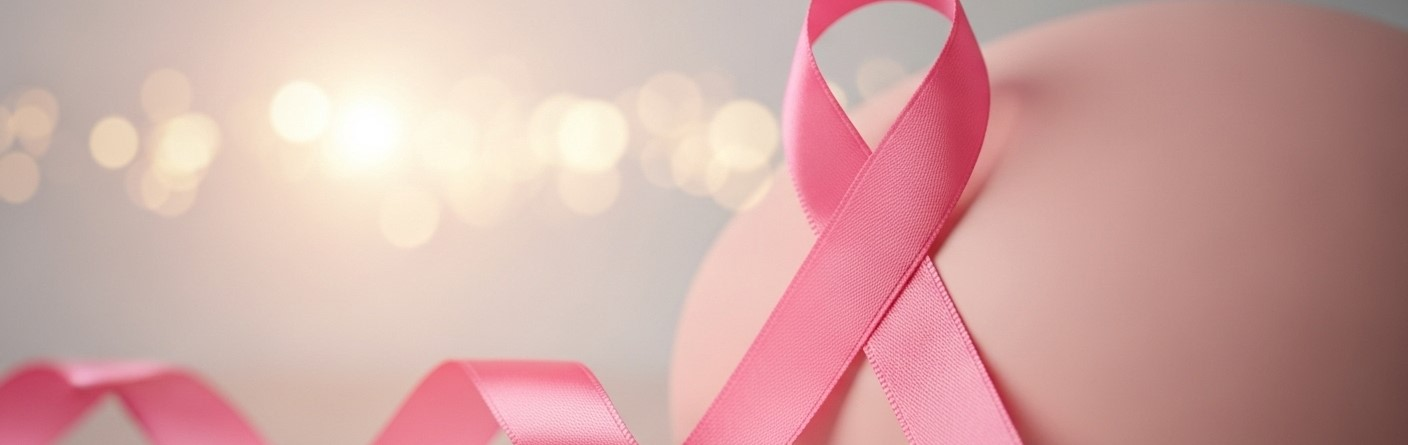

In [250]:
X = [14.1, 20.3, 0.095]
target_output = [1]   # Malignant

W1 = [[0.5, -0.3, 0.8],
      [0.2, 0.4, -0.6],
      [-0.7, 0.9, 0.1]]
B1 = [0.3, -0.5, 0.6]

In [251]:
layer1 = Dense_Layer(X, W1, B1)
z1 = layer1.weighted_sum()
out1 = layer1.activation(z1, "relu")
print("Layer 1 Output:", out1)

Layer 1 Output: [11.3435  3.4755  0.    ]


In [252]:
W2 = [[0.6, -0.2],
      [0.4, -0.3],
      [0.5, 0.7]]
B2 = [0.1, -0.8]

In [253]:
layer2 = Dense_Layer(out1, W2, B2)
z2 = layer2.weighted_sum()
out2 = layer2.activation(z2, "sigmoid")
print("Layer 2 Output:", out2)

Layer 2 Output: [0.99975062 0.01612148]


In [254]:
W3 = [[0.7],
      [-0.5]]
B3 = [0.2]

In [255]:
layer3 = Dense_Layer(out2, W3, B3)
z3 = layer3.weighted_sum()
final_output = layer3.activation(z3, "sigmoid")
print("Final Output (Predicted probability Malignant):", final_output)

Final Output (Predicted probability Malignant): [0.70925421]


In [256]:
loss = layer3.calculate_loss(final_output, target_output)
print("Loss:", loss)

Loss: 0.34354126812072033


In [257]:
print("Layer 1 Output:", out1)
print("Layer 2 Output:", out2)
print("Final Output (Predicted probability Malignant):", final_output)
probability = final_output[0]
print(f"The predicted probability of the tumor being Malignant is approximately {probability:.2%}.")
print("Loss:", loss)

Layer 1 Output: [11.3435  3.4755  0.    ]
Layer 2 Output: [0.99975062 0.01612148]
Final Output (Predicted probability Malignant): [0.70925421]
The predicted probability of the tumor being Malignant is approximately 70.93%.
Loss: 0.34354126812072033
